In [175]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import pickle

In [119]:
df = pd.read_csv(r"C:\Users\hp\Desktop\python\datasets\credit\train_u6lujuX_CVtuZ9i.csv")
df.head(10) 
# pour voir toute la base de donnees : pd.set_option('display.max_rows', df.shape[0]+1)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [4]:
# les valeurs manquantes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
df.isnull().sum().sort_values(ascending=False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_ID               0
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
# les variables categoriques
df.describe(include='O')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001136,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [149]:
# diviser la base de donnees en variable categorique et en variable numerique
cat_data = []
num_data =[]

for i,c in enumerate(df.dtypes):
    if c==object:
        cat_data.append(df.iloc[:,i])
    else:
        num_data.append(df.iloc[:,i]) 
#transformer en dataframe
cat_data=pd.DataFrame(cat_data).transpose()
num_data=pd.DataFrame(num_data).transpose()

In [150]:
# les variables categoriques on les remplace par la valeur la plus repetee
cat_data = cat_data.apply(lambda x:x.fillna(x.value_counts().index[0]))
cat_data.isnull().sum().any()


False

In [151]:
# pour les valeurs numeriques on remplace la valeur precedente
num_data.fillna(method='bfill',inplace=True)
num_data.isnull().sum().any()

False

In [152]:
#transformer la colonne target
target_value={'Y':1,'N':0}
target = cat_data['Loan_Status']
target= target.map(target_value)
cat_data.drop('Loan_Status',axis=1,inplace=True)
target

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [153]:
# transformer les variables categoriques en 0,1,2...
le = LabelEncoder()
for i in cat_data:
    cat_data[i] = le.fit_transform(cat_data[i])
cat_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,0,1,0,0,0,0,2
1,1,1,1,1,0,0,0
2,2,1,1,0,0,1,2
3,3,1,1,0,1,0,2
4,4,1,0,0,0,0,2
...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,0
610,610,1,1,3,0,0,0
611,611,1,1,1,0,0,2
612,612,1,1,2,0,0,2


In [154]:
# supprimer loan_id
cat_data= cat_data.drop('Loan_ID', axis=1)


In [155]:
cat_data

,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,1,0,0,0,0,2
1,1,1,1,0,0,0
2,1,1,0,0,1,2
3,1,1,0,1,0,2
4,1,0,0,0,0,2
...,...,...,...,...,...,...
609,0,0,0,0,0,0
610,1,1,3,0,0,0
611,1,1,1,0,0,2
612,1,1,2,0,0,2


In [169]:
# concatener cat_data et num_data
X=pd.concat([cat_data,num_data],axis=1)
y=target

In [157]:
# variable target
target.value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

le pourcentage des credits accordés:0.3127035830618892
le pourcentage des credits non  accordés:0.6872964169381107


C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


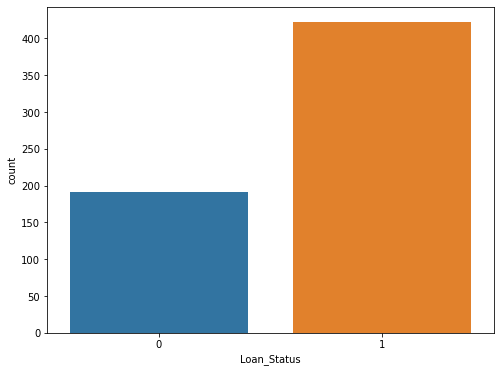

In [128]:
plt.figure(figsize=(8,6))
sns.countplot(target)
yes=target.value_counts()[0]/len(target)
no=target.value_counts()[1]/len(target)
print(f'le pourcentage des credits accordés:{yes}')
print(f'le pourcentage des credits non  accordés:{no}')

In [161]:
# la base de donnees pour le EDA
df =pd.concat([cat_data,num_data,target],axis=1)
df

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,1,0,0,0,0,2,5849.0,0.0,128.0,360.0,1.0,1
1,1,1,1,0,0,0,4583.0,1508.0,128.0,360.0,1.0,0
2,1,1,0,0,1,2,3000.0,0.0,66.0,360.0,1.0,1
3,1,1,0,1,0,2,2583.0,2358.0,120.0,360.0,1.0,1
4,1,0,0,0,0,2,6000.0,0.0,141.0,360.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,0,2900.0,0.0,71.0,360.0,1.0,1
610,1,1,3,0,0,0,4106.0,0.0,40.0,180.0,1.0,1
611,1,1,1,0,0,2,8072.0,240.0,253.0,360.0,1.0,1
612,1,1,2,0,0,2,7583.0,0.0,187.0,360.0,1.0,1


C:\Users\hp\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


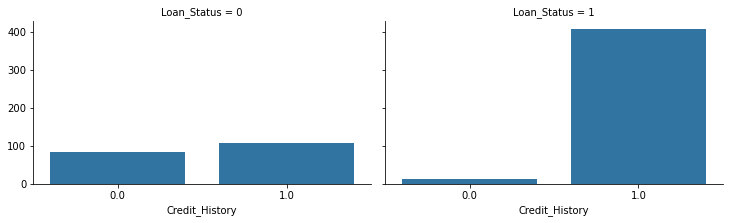

In [162]:
# credit history
grid=sns.FacetGrid(df,col='Loan_Status', size=3.2,aspect=1.6)
grid.map(sns.countplot,'Credit_History')

C:\Users\hp\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


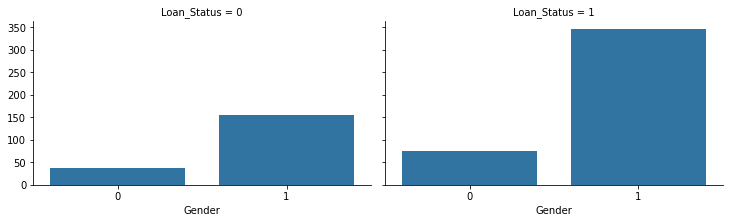

In [163]:
#Sexe
grid=sns.FacetGrid(df,col='Loan_Status', size=3.2,aspect=1.6)
grid.map(sns.countplot,'Gender')

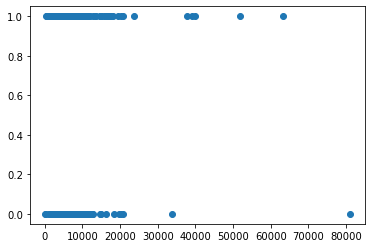

In [164]:
#revenu du demandeur
plt.scatter(df['ApplicantIncome'],df['Loan_Status'])

In [166]:
# voir le seuil d'acceptation
df.groupby('Loan_Status').median()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Loan_Status,,,,,,,,,,,
0,1,1,0,0,0,1,3833.5,268.0,132.5,360.0,1.0
1,1,1,0,0,0,1,3812.5,1239.5,127.5,360.0,1.0


In [182]:
# diviser la base de donnees en train and test set
sss= StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train, test in sss.split(X,y):
    X_train,X_test= X.iloc[train],X.iloc[test]
    y_train ,y_test= y.loc[train],y.loc[test]

print('X_train taille:',X_train.shape)
print('X_testille:',X_test.shape)
print('y_rain taille:',y_train.shape)
print('X_train taille:',test.shape)

X_train taille: (491, 11)
X_testille: (123, 11)
y_rain taille: (491,)
X_train taille: (123,)


In [185]:
# on use les 3 algo Logistic Regression, KNN et DecisionTree
 
models={
    'LogisticRegression':LogisticRegression(random_state=42),
    'KNeighborsClassifier':KNeighborsClassifier(),
    'DecisionTreeClassifier':DecisionTreeClassifier(max_depth=1,random_state=42)
}

# fonction de precision
def accu(y_true,y_pred,retu=False):
    acc=accuracy_score(y_true,y_pred)
    if retu:
        return acc
    else:
        print(f'la precision de modele est: {acc}')
# fonction d'application
def train_test_eval(models, X_train,y_train,X_test,y_test):
    for name,model in models.items():
        print(name,':')
        model.fit(X_train,y_train)
        accu(y_test,model.predict(X_test))
        print('-'*30)
train_test_eval(models, X_train,y_train,X_test,y_test)
        


LogisticRegression :
la precision de modele est: 0.8536585365853658
------------------------------
KNeighborsClassifier :
la precision de modele est: 0.6504065040650406
------------------------------
DecisionTreeClassifier :
la precision de modele est: 0.8455284552845529
------------------------------


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [187]:
X_2=X[['Credit_History','Gender','Married','CoapplicantIncome','ApplicantIncome']]

In [188]:
# diviser la base de donnees en train and test set
sss= StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train, test in sss.split(X_2,y):
    X_train,X_test= X_2.iloc[train],X_2.iloc[test]
    y_train ,y_test= y.loc[train],y.loc[test]

print('X_train taille:',X_train.shape)
print('X_testille:',X_test.shape)
print('y_rain taille:',y_train.shape)
print('X_train taille:',test.shape)

X_train taille: (491, 5)
X_testille: (123, 5)
y_rain taille: (491,)
X_train taille: (123,)


In [189]:
train_test_eval(models, X_train,y_train,X_test,y_test)

LogisticRegression :
la precision de modele est: 0.8536585365853658
------------------------------
KNeighborsClassifier :
la precision de modele est: 0.6585365853658537
------------------------------
DecisionTreeClassifier :
la precision de modele est: 0.8455284552845529
------------------------------


In [190]:
# appliquer la regression logistique sur la base de donnees
Classifier= LogisticRegression()
Classifier.fit(X_2,y)

LogisticRegression()

In [192]:
# enregistrer le model
pickle.dump(Classifier,open('model.pkl','wb'))